In [1]:
!ls

Computer RA.ipynb
OCR.ipynb
Test
Train


In [2]:
#!ls Test/

In [3]:
!cd

C:\Users\Mohammed\Desktop\Computer RA Task\Task Dataset


In [90]:
import cv2
import glob
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
#load data sets

In [6]:
imdir = 'Train/'
ext = ['png', 'jpg', 'gif']    #image formats

Train_files = []
[Train_files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
Train_files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])   #to sort files by number to right mapping to the labels
Train_images = [cv2.imread(file) for file in Train_files]

In [7]:
imdir = 'Test/'
ext = ['png', 'jpg', 'gif']    #image formats

Test_files = []
[Test_files.extend(glob.glob(imdir + '*.' + e)) for e in ext]
Test_files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])   #to sort files by number to right mapping to the labels

Test_images = [cv2.imread(file) for file in Test_files]

In [8]:
len(Train_images),len(Test_images)

(2400, 200)

In [9]:
TrainingLabelsPath = 'Train/Training Labels.txt'

In [10]:
TestingLabelsPath = 'Test/Test Labels.txt'

In [11]:
Train_labels = []
#Reading file and extracting labels
with open(TrainingLabelsPath, 'r') as File:
    infoFile = File.readlines() #Reading all the lines from File
    for line in infoFile: #Reading line-by-line
        words = line.split() #Splitting lines in words using space character as separator
        Train_labels.append(int(words[0]))

In [12]:
Test_labels = []
#Reading file and extracting labels
with open(TestingLabelsPath, 'r') as File:
    infoFile = File.readlines() #Reading all the lines from File
    for line in infoFile: #Reading line-by-line
        words = line.split() #Splitting lines in words using space character as separator
        Test_labels.append(int(words[0]))

In [13]:
len(Train_labels),len(Test_labels)

(2400, 200)

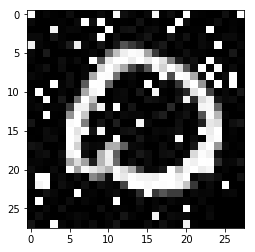

In [14]:
plt.imshow(Train_images[100])  #we note here there are noise in all images

In [15]:
Train_labels[100]   #only to make sure of right label for the same image and equle to 0

0

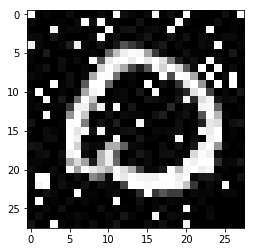

In [16]:
gray=cv2.cvtColor(Train_images[100],cv2.COLOR_BGRA2GRAY)  #convert to gray scale
plt.imshow(gray,cmap='gray')

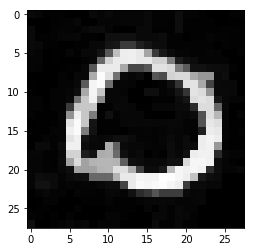

In [17]:
median1 = cv2.medianBlur(gray,3)   #apply medianBlur filter to remove noise
plt.imshow(median1,cmap='gray')

In [18]:
#apply convert to gray and apply medianBlur filter for all trainging images
Train_imagesNew=[]
for i in range (len(Train_images)):
    gray=cv2.cvtColor(Train_images[i],cv2.COLOR_BGRA2GRAY)  #convert to gray scale
    median1 = cv2.medianBlur(gray,3)
    imagem1 = cv2.bitwise_not(median1)
    Train_imagesNew.append(imagem1)

In [25]:
#apply convert to gray and apply medianBlur filter for all Test images
Test_imagesNew=[]
for i in range (len(Test_images)):
    gray=cv2.cvtColor(Test_images[i],cv2.COLOR_BGRA2GRAY)  #convert to gray scale
    median2 = cv2.medianBlur(gray,3)
    imagem2 = cv2.bitwise_not(median2)
    Test_imagesNew.append(imagem2)

In [26]:
np.shape(Train_images[1000])

(28, 28, 3)

In [27]:
np.shape(Train_imagesNew[1000])

(28, 28)

# Try some methods to measure the similarity between two images and select the best one for such task

**First method is comparing by Histogram Calculation**

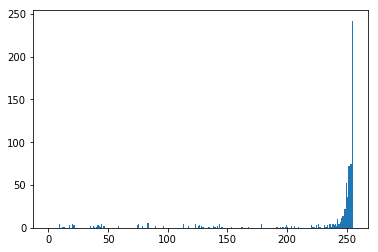

In [28]:
plt.hist(Train_imagesNew[1000].ravel(), 255, [0, 255])   #class 4
plt.show()

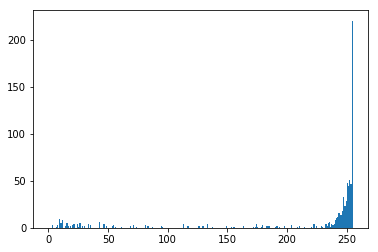

In [29]:
plt.hist(Train_imagesNew[0].ravel(), 255, [0, 255])  #class 0
plt.show()

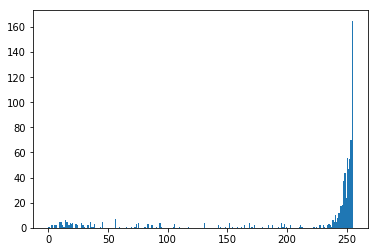

In [30]:
plt.hist(Train_imagesNew[100].ravel(), 255, [0, 255]) #class 0
plt.show()


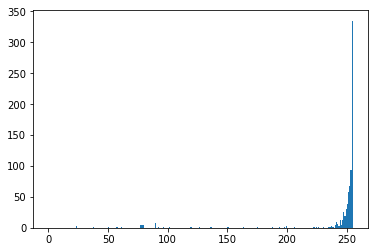

In [31]:
plt.hist(Train_imagesNew[300].ravel(), 255, [0, 255]) #class 1
plt.show()


In [32]:
H4 = cv2.calcHist(Train_imagesNew[1000],[0],None,[256],[0,256])  #class 4
H0 = cv2.calcHist(Train_imagesNew[0],[0],None,[256],[0,256])    #class 0
H00 = cv2.calcHist(Train_imagesNew[100],[0],None,[256],[0,256])  #class 0
H44 = cv2.calcHist(Train_imagesNew[1001],[0],None,[256],[0,256])  #class 4

In [33]:
cv2.compareHist(H0, H0,cv2.HISTCMP_CORREL)  #the same image

1.0

In [34]:
cv2.compareHist(H00, H0,cv2.HISTCMP_CORREL)   #same class

0.5819701558461258

In [35]:
cv2.compareHist(H4, H0,cv2.HISTCMP_CORREL)  #different class

0.6088380985921062

In [36]:
cv2.compareHist(H0, H44, cv2.HISTCMP_CORREL)  #differet class

0.7715446075896529

In [37]:
cv2.compareHist(H4, H44, cv2.HISTCMP_CORREL)  #same class

0.6902761336462414

**Second method by measuring Mean Squared Error between two images**

In [38]:
def mse(imageA, imageB):
# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [39]:
mse(Train_imagesNew[1000],Train_imagesNew[0])  #different class

8039.494897959184

In [40]:
mse(Train_imagesNew[0],Train_imagesNew[300])  #different class

6861.510204081633

In [41]:
mse(Train_imagesNew[0],Train_imagesNew[100])  ##Same class

9104.237244897959

In [42]:
mse(Train_imagesNew[1000],Train_imagesNew[1001])  #Same class

3068.1352040816328

In [43]:
mse(Train_imagesNew[100],Train_imagesNew[200])  #Same class

10670.456632653062

**third method is Structural Similarity Index**:

SSIM attempts to model the perceived change in the structural information of the image, whereas MSE is actually estimating the perceived errors. There is a subtle difference between the two, but the results are dramatic Luckily this method exist in  scikit-image library.

In [44]:
#!pip --default-timeout=600 install --upgrade scikit-image
from skimage.metrics import structural_similarity

In [45]:
structural_similarity(Train_imagesNew[1000],Train_imagesNew[200]) #different class

0.14903466745363678

In [46]:
structural_similarity(Train_imagesNew[0],Train_imagesNew[100]) ##Same class

0.13300864632577178

In [47]:
structural_similarity(Train_imagesNew[1000],Train_imagesNew[0])  #differnt class

0.08668016976952715

In [48]:
structural_similarity(Train_imagesNew[150],Train_imagesNew[200])  #Same class

0.3745382231508377

**Forth method Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)**

In [49]:
# calculate the Euclidean distance between two vectors
dist=[0]
def euclidean_distance(imageA,imageB):
    distance = 0.0
    for i in range(len(imageA[0])):
        distance += (imageA[i] - imageB[i])**2
    del dist[:]
    dist.append(np.sqrt(distance))

In [50]:
euclidean_distance(Train_imagesNew[100],Train_imagesNew[200])  #Same class
dist[0]

array([23.93741841, 28.54820485, 21.97726098, 13.37908816, 20.5669638 ,
       34.56877203, 36.23534186, 44.754888  , 49.63869458, 43.80639223,
       59.1776985 , 51.28352562, 53.48831648, 41.36423576, 42.10700654,
       41.95235393, 47.4341649 , 48.22862221, 54.3599117 , 50.42816673,
       37.05401463, 39.25557285, 49.43682838, 45.85847795, 45.62893819,
       26.70205985, 17.20465053, 13.26649916])

In [51]:
Train_labels[0],Train_labels[200]

(0, 0)

In [52]:
euclidean_distance(Train_imagesNew[100],Train_imagesNew[200])  #same class
np.sum(dist[0])

1081.644068813796

In [53]:
euclidean_distance(Train_imagesNew[1000],Train_imagesNew[200]) #different class
np.sum(dist[0])

988.0947590959299

In [54]:
euclidean_distance(Train_imagesNew[0],Train_imagesNew[200]) #Same class
np.sum(dist[0])

964.8601427697856

In [55]:
euclidean_distance(Train_imagesNew[1000],Train_imagesNew[0])  #same class
np.sum(dist[0])

1048.4480247750305

**Develop k-Nearest Neighbors( (without libraries)**

we will use Structural Similarity Index to measure the similarity

In [56]:
len(Train_imagesNew),len(Train_labels)

(2400, 2400)

In [70]:
distLabels=[]
def ssim_AllImgs(test_img,AllImags):
    del distLabels[:]
    for i in range (len(AllImags)):
        dist=structural_similarity(test_img,AllImags[i])
        labelImg=Train_labels[i]
        distLabels.append({"dist":dist,'class':labelImg})

In [71]:
# Locate the most similar neighbors
def get_neighbors(test_img, AllImags, K):
    ssim_AllImgs(test_img,AllImags)
    sorted_dicImg=sorted(distLabels, key=lambda x: (x['dist']),reverse=True)
    neighbors = list()
    for i in range(K):
        neighbors.append(sorted_dicImg[i])
    return neighbors

The most similar neighbors collected from the training dataset can be used to make predictions.

In the case of classification, we can return the most represented class among the neighbors.

We can achieve this by performing the max() function on the list of output values from the neighbors. Given a list of class values observed in the neighbors, the max() function takes a set of unique class values and calls the count on the list of class values for each class value in the set.

In [87]:
# Make a classification prediction with neighbors
def predict_classification(test_img,AllImags,k):
    neighbors=get_neighbors(test_img,AllImags,k)
    output_class=[0]
    for i in range(len(neighbors)):
        output_class.append(neighbors[i]['class'])
    prediction = max(set(output_class))
    del output_class[:]
    return prediction

In [91]:
prediction = predict_classification(Train_imagesNew[1000],Train_imagesNew,k=10)  #test our function for one random image
print('Expected %d, Got %d.' % (Train_labels[1000], prediction))

Expected 4, Got 4.


In [121]:
K_list=np.arange(3, 100,2).tolist()

In [125]:
print(K_list)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [122]:
#apply list of k values 3:99 by step 2 for random choose image we known its label=4
pre_label_ranImg=[]
for i in range (len(K_list)):
    pre_label_ranImg.append(predict_classification(Train_imagesNew[1000],Train_imagesNew,k=K_list[i]))

In [126]:
print(pre_label_ranImg)  #we see here the first 5 labels are right while the rest are not 
#so we will choose the first 5 k values that are k=[3, 5, 7, 9, 11] and mesure the accurcy for each and compare

[4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


In [127]:
#validate each one in traning images for each k value
k=[3, 5, 7, 9, 11]
pre_label_AllImgs=[]
for i in k:
    for j in range (len(Train_imagesNew)):
        pre_label_AllImgs.append(predict_classification(Train_imagesNew[j],Train_imagesNew,k=K_list[i]))

In [128]:
#here split a pre_label_AllImgs list into 5 lists each with the same legth =2400 as the length of training labels images
pred_K5 = pre_label_AllImgs[0: 2400]
pred_k7 = pre_label_AllImgs[2400:4800]
pred_k9 = pre_label_AllImgs[4800:7200]
pred_k11 = pre_label_AllImgs[7200:9600]
pred_k13 = pre_label_AllImgs[9600:12000]

In [129]:
pred_k_list=[pred_K5,pred_k7,pred_k9,pred_k11,pred_k13]
Accuracy_k=[]
for i in range(len(pred_k_list)):
    Accuracy_k.append(accuracy_score(pred_k_list[i],Train_labels))

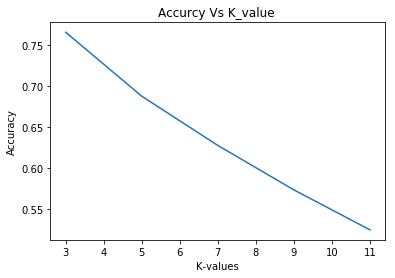

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("K-values")
plt.ylabel("Accuracy")
plt.title("Accurcy Vs K_value ")
plt.plot(k,Accuracy_k)
plt.show()

**We see here the accuracy is decreased depend on the increase the k values and that for all traing images so we will pick k=3**

In [132]:
y_predict=[]  #predict the labels for test images when k=3
for i in range (len(Test_imagesNew)):
    y_predict.append(predict_classification(Test_imagesNew[i],Train_imagesNew,k=3))

In [133]:
accuracy_score(y_predict,Test_labels)

0.86

In [140]:
confusion_matrix=confusion_matrix(y_predict,Test_labels)

In [142]:
confusion_matrix=pd.DataFrame(confusion_matrix)

In [146]:
confusion_matrix

,0,1,2,3,4,5,6,7,8,9
0,19,0,0,0,0,0,0,0,0,0
1,0,20,0,0,0,0,0,0,0,0
2,0,0,16,0,0,0,0,0,0,0
3,0,0,1,17,0,1,0,0,0,0
4,0,0,0,0,12,0,0,0,0,0
5,0,0,0,2,0,16,0,0,6,0
6,1,0,1,0,1,0,20,0,0,0
7,0,0,1,1,0,0,0,19,0,0
8,0,0,1,0,0,2,0,0,13,0
9,0,0,0,0,7,1,0,1,1,20


In [144]:
confusion_matrix.to_html('confusion_matrix.html')  #export confusion_matrix as html file to easy readable